In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
import requests

In [4]:
conn = sqlite3.connect(':memory:') 
cursor = conn.cursor()
cursor.execute('CREATE TABLE students (id INTEGER, name TEXT, grade INTEGER)')
data = [(1, 'Alice', 85), (2, 'Bob', 90), (3, 'Charlie', 78), (4, 'David', 92)]
cursor.executemany('INSERT INTO students VALUES (?,?,?)', data)
conn.commit()

In [5]:
# data collection from a database
query = "SELECT * FROM students"
df_db = pd.read_sql_query(query, conn)
print(df_db)
conn.close()

   id     name  grade
0   1    Alice     85
1   2      Bob     90
2   3  Charlie     78
3   4    David     92


In [6]:
# data collection from an API

api_url = "https://jsonplaceholder.typicode.com/users"
response = requests.get(api_url)

if response.status_code == 200:
    json_data = response.json()
    df_api = pd.DataFrame(json_data)
    df_api_clean = df_api[['id', 'name', 'email']]
    print(df_api_clean.head())
else:
    print("Failed to fetch API data")

   id              name                      email
0   1     Leanne Graham          Sincere@april.biz
1   2      Ervin Howell          Shanna@melissa.tv
2   3  Clementine Bauch         Nathan@yesenia.net
3   4  Patricia Lebsack  Julianne.OConner@kory.org
4   5  Chelsey Dietrich   Lucio_Hettinger@annie.ca


In [7]:
# data colletion from a sensor

sensor_data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

try:
    df_sensor = pd.read_csv(sensor_data_url, parse_dates=['Date'])
    print(df_sensor.head())
except Exception as e:
    print(f"Error: {e}")

        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


In [8]:
from bs4 import BeautifulSoup

In [9]:
# data collection by web scraping

url = "http://quotes.toscrape.com/"

try:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # The site holds quotes in <span class="text"> and authors in <small class="author">
    quotes = soup.find_all('span', class_='text')
    authors = soup.find_all('small', class_='author')

    scraped_data = []
    for quote, author in zip(quotes, authors):
        scraped_data.append({
            'Author': author.text,
            'Quote': quote.text
        })

    df_scraping = pd.DataFrame(scraped_data)
    print(df_scraping.head())

except Exception as e:
    print(f"Error: {e}")

            Author                                              Quote
0  Albert Einstein  “The world as we have created it is a process ...
1     J.K. Rowling  “It is our choices, Harry, that show what we t...
2  Albert Einstein  “There are only two ways to live your life. On...
3      Jane Austen  “The person, be it gentleman or lady, who has ...
4   Marilyn Monroe  “Imperfection is beauty, madness is genius and...


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [11]:
# collecting an image

# Using a standard data science sample image (more reliable than Wikipedia for testing)
image_url = "https://raw.githubusercontent.com/scikit-image/scikit-image/main/skimage/data/chelsea.png"

try:
    # We use a specific header to look like a real browser
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
    response = requests.get(image_url, headers=headers, stream=True)
    
    # Check if the download was actually successful (Code 200)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img_array = np.array(img)
        
        print(f"Image Shape: {img_array.shape}")
        print(f"Data Type: {img_array.dtype}")
        
        plt.figure(figsize=(4, 4))
        plt.imshow(img_array)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to download. Status Code: {response.status_code}")

except Exception as e:
    print(f"Error: {e}")

Failed to download. Status Code: 404


In [12]:
import cv2
import os

Video Loaded: 1280x720 resolution
Total Frames: 360
FPS: 23.976023976023978


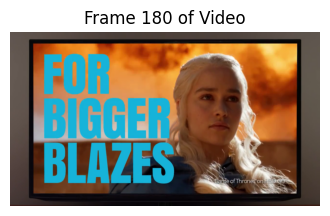

In [22]:
# collecting data from a video

video_url = "http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/ForBiggerBlazes.mp4"
video_path = "temp_video.mp4"

try:
    print(f"Downloading video from {video_url}...")
    response = requests.get(video_url, timeout=15)
    
    with open(video_path, 'wb') as f:
        f.write(response.content)

    cap = cv2.VideoCapture(video_path)

    if cap.isOpened():
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
        print(f"Video Loaded: {width}x{height} resolution")
        print(f"Total Frames: {frame_count}")
        print(f"FPS: {fps}")
        
        # Read the very middle frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count // 2)
        ret, frame = cap.read()
        
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(4, 4))
            plt.imshow(frame_rgb)
            plt.axis('off')
            plt.title(f"Frame {frame_count // 2} of Video")
            plt.show()
        
        cap.release()
    else:
        print("Failed to open video.")

except Exception as e:
    print(f"Error processing video: {e}")

if os.path.exists(video_path):
    os.remove(video_path)

In [14]:
from scipy.io import wavfile

In [23]:
# collecting data from an audio file

audio_url = "https://raw.githubusercontent.com/microsoft/music-understanding/main/examples/test_audio.wav"
audio_path = "temp_audio.wav"

try:
    print(f"Downloading audio from {audio_url}...")
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
    response = requests.get(audio_url, headers=headers)
    
    # Check if we actually got the file
    if response.status_code == 200:
        with open(audio_path, 'wb') as f:
            f.write(response.content)

        # Process: Read sample rate and data
        sample_rate, audio_data = wavfile.read(audio_path)
        
        print(f"Sample Rate: {sample_rate} Hz")
        
        # Calculate duration
        duration = len(audio_data) / sample_rate
        print(f"Audio Duration: {duration:.2f} seconds")
        
        # If stereo (2 channels), just take the first channel for plotting
        if len(audio_data.shape) > 1:
            audio_data = audio_data[:, 0]

        # Plot the waveform
        plt.figure(figsize=(10, 3))
        # Create a time axis for the plot
        time_axis = np.linspace(0, duration, num=len(audio_data))
        plt.plot(time_axis, audio_data)
        plt.title("Audio Waveform")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()
    else:
        print(f"Download failed. Status Code: {response.status_code}")
        # Print first 100 characters to see if it's an error page
        print(response.text[:100]) 

except Exception as e:
    print(f"Error importing audio: {e}")

# Cleanup
if os.path.exists(audio_path):
    os.remove(audio_path)

Download failed. Status Code: 404
404: Not Found


In [16]:
import time
from datetime import datetime

In [24]:
# collecting data from a live sensor

# URL for USGS live earthquake sensor feed (GeoJSON format)
# This feed contains all earthquakes recorded in the last hour
URL = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.geojson"

def get_live_sensor_data():
    try:
        # 1. Extract: Send a GET request to the cloud endpoint
        response = requests.get(URL)
        
        if response.status_code == 200:
            # 2. Parse: Convert JSON response to a Python dictionary
            data = response.json()
            
            # The 'features' list contains the actual sensor readings
            readings = data['features']
            
            print(f"\n--- Live Sensor Update: {datetime.now().strftime('%H:%M:%S')} ---")
            print(f"Total events detected in past hour: {data['metadata']['count']}")
            
            # Display the first 3 most recent readings
            for i, reading in enumerate(readings[:3]):
                props = reading['properties']
                magnitude = props['mag']
                location = props['place']
                print(f"#{i+1}: Magnitude {magnitude} - Location: {location}")
        else:
            print("Error: Could not connect to cloud.")
            
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the extraction loop
if __name__ == "__main__":
    print("Starting Live Sensor Stream...")
    get_live_sensor_data()

Starting Live Sensor Stream...

--- Live Sensor Update: 23:17:20 ---
Total events detected in past hour: 9
#1: Magnitude 1.13 - Location: 32 km ENE of Little Lake, CA
#2: Magnitude 1.58 - Location: 3 km NW of The Geysers, CA
#3: Magnitude 0.93 - Location: 9 km SW of Idyllwild, CA


In [19]:
import json

In [25]:
# collecting data in json format and also flattening it

json_str = """
{
    "model_name": "GPT-X",
    "version": 4.0,
    "layers": [
        {"id": 1, "type": "attention", "units": 512},
        {"id": 2, "type": "feed_forward", "units": 2048}
    ],
    "metrics": {
        "accuracy": 0.95,
        "loss": 0.05
    }
}
"""

data = json.loads(json_str)

# Flatten 'layers' while keeping model-level fields
df = pd.json_normalize(
    data,
    record_path=['layers'],
    meta=['model_name', 'version', ['metrics', 'accuracy'], ['metrics', 'loss']]
)

print(df)

   id          type  units model_name version metrics.accuracy metrics.loss
0   1     attention    512      GPT-X     4.0             0.95         0.05
1   2  feed_forward   2048      GPT-X     4.0             0.95         0.05


In [26]:
import xml.etree.ElementTree as ET

In [27]:
# collecting data in xml format and also parsing it

xml_data = """
<dataset>
    <record>
        <id>101</id>
        <feature>Temperature</feature>
        <value>23.5</value>
    </record>
    <record>
        <id>102</id>
        <feature>Humidity</feature>
        <value>45.2</value>
    </record>
</dataset>
"""

# Parse XML
root = ET.fromstring(xml_data)

# Process: Extract data into a list of dictionaries
parsed_data = []
for record in root.findall('record'):
    r_id = record.find('id').text
    feature = record.find('feature').text
    value = float(record.find('value').text)
    parsed_data.append({
        "ID": r_id,
        "Feature": feature,
        "Value": value
    })

# Convert into DataFrame
df_xml = pd.DataFrame(parsed_data)

print(df_xml)

    ID      Feature  Value
0  101  Temperature   23.5
1  102     Humidity   45.2
